In [106]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [4]:
#%pip install missingno

### Observations

- Feature 2: Showing an interesting trend
- Feature 3: Almost all NaN values 
- Feature 5 and 6: boolean
- Feature 7: discrete values in cluster
- Feature 8: discrete values range from 2-5

##### Pairplot observations 
- Feature 1 and Y: Increasing in Feature 1 deacreses Y
- Similar for Feature 2
- Feature 9: Increasing trend

Relavant features so far:
- Feature 1, Feature 2, Feature 7-9

1) We want to separate the data from the analysis.
2) We want to be able to automate our analysis. 
3) We want our analysis to be repoudicble.

In [105]:
def load_data(path):
    delimete = ";"
    dataf = pd.read_csv(path, sep=delimete)
    dataf.columns = dataf.columns.str.lower()
    dataf.columns = dataf.columns.str.replace(" ", "_")
    dataf.dropna(inplace=True)
    #dataf = dataf.drop(columns=["feature_3"])
    # Split features and target variable
    X = dataf.drop(columns=['y'])
    y = dataf['y']
    
    return X, y

def build_pipeline():
    numeric_features = ['feature_1', 'feature_2', 'feature_4', 'feature_7', 'feature_8']
    categorical_features = ['feature_5', 'feature_6']
    
    # Preprocessing for numerical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Preprocessing for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine the preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Create the pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor1', LinearRegression()),
        ("regressor2", RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    return pipeline

def train_model(X_train, y_train, pipeline):
    pipeline.fit(X_train, y_train)

def evaluate_model(X_test, y_test, pipeline):
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")    

def save_model(pipeline, file_name):
    joblib.dump(pipeline, file_name)

def load_model(file_name):
    return joblib.load(file_name)

if __name__ == "__main__":
    path = "./data.csv"
    
    X, y = load_data(path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    pipeline = build_pipeline()
    train_model(X_train, y_train, pipeline)
    evaluate_model(X_test, y_test, pipeline)
    #save_model(pipeline, 'trained_model.pkl')


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression()' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't

In [5]:
!head -10 data.csv

Y;Feature 1;Feature 2;Feature 3;Feature 4;Feature 5;Feature 6;Feature 7;Feature 8;Feature 9
13500;23;46986;1;90;1;0;2000;3;1165
13750;23;72937;1;90;1;0;2000;3;1165
13950;24;41711;1;90;1;0;2000;3;1165
14950;26;48000;1;90;0;0;2000;3;1165
13750;30;38500;1;90;0;0;2000;3;1170
12950;32;61000;1;90;0;0;2000;3;1170
16900;27;94612;1;90;1;0;2000;3;1245
18600;30;75889;1;90;1;0;2000;3;1245
21500;27;19700;0;192;0;0;1800;3;1185


In [194]:
def load_data(filename):
    assert os.path.exists(filename), print("Dataset does not exist!")
    delimete = ";"
    dataf = pd.read_csv(filename, sep=delimete)
    dataf.columns = dataf.columns.str.lower()
    dataf.columns = dataf.columns.str.replace(" ", "_")
    return dataf 

def start_pipeline(dataf):
    return dataf.copy()
    
def clean_dataset(dataf):
    dataf.isnull().any()
    missing_values = dataf["feature_3"].isnull().sum()
    print(f"There are {missing_values} missing values in feature 3 column\n")
    dataf.dropna(inplace=True)
    dataf.drop("feature_3", axis=1, inplace=True)
    return dataf

def remove_outliers(dataf):
    return dataf

def split_data(dataf):
    X = dataf.drop("y", axis=1)
    y = dataf.y
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    return train_X, val_X, train_y, val_y

def evaluate_metric(regressor, train_X, val_X, train_y, val_y, error="",  **kwargs):
    model = regressor(**kwargs)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    if error == "mae":
        mae = mean_absolute_error(val_y, preds_val)
        return(mae)
    else:
        mse = mean_squared_error(val_y, preds_val)
        return(mse)

def build_pipline(dataf):
    pipeline = df.pipe(start_pipeline)
                 .pipe(clean_dataset)
                 .pipe(remove_outliers)
                 .pipe(split_data))
    

In [8]:
df.shape

(1436, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y          1436 non-null   int64  
 1   feature_1  1436 non-null   int64  
 2   feature_2  1436 non-null   int64  
 3   feature_3  414 non-null    float64
 4   feature_4  1436 non-null   int64  
 5   feature_5  1436 non-null   int64  
 6   feature_6  1436 non-null   int64  
 7   feature_7  1436 non-null   int64  
 8   feature_8  1436 non-null   int64  
 9   feature_9  1436 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 112.3 KB


In [10]:
df.dtypes.value_counts()

int64      9
float64    1
Name: count, dtype: int64

In [11]:
df.describe() 

,y,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,1436.000000,1436.000000,1436.000000,414.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.173913,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,0.379493,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,1.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [12]:
df.isna().sum()

y               0
feature_1       0
feature_2       0
feature_3    1022
feature_4       0
feature_5       0
feature_6       0
feature_7       0
feature_8       0
feature_9       0
dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


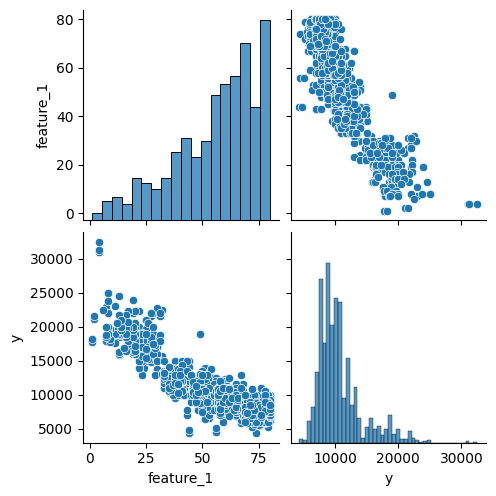

In [19]:
sns.pairplot(df[["feature_1", "y"]])

### Structure of Numerical Features 

feature_3       2
feature_5       2
feature_6       2
feature_8       4
feature_7      12
feature_4      12
feature_9      59
feature_1      77
y             236
feature_2    1263
dtype: int64


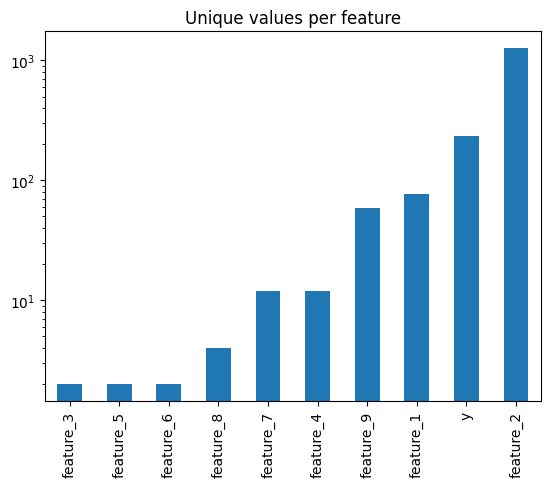

In [16]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

print(unique_values)
unique_values.plot.bar(logy=True, title="Unique values per feature");

### Quality of features

- Duplicates, missing values, outliers

In [17]:
# number of duplicates
df.duplicated().sum()

1

Y               0
Feature 1       0
Feature 2       0
Feature 3    1022
Feature 4       0
Feature 5       0
Feature 6       0
Feature 7       0
Feature 8       0
Feature 9       0
dtype: int64
Y            0.000000
Feature 1    0.000000
Feature 2    0.000000
Feature 4    0.000000
Feature 6    0.000000
Feature 5    0.000000
Feature 7    0.000000
Feature 8    0.000000
Feature 9    0.000000
Feature 3    0.711699
dtype: float64


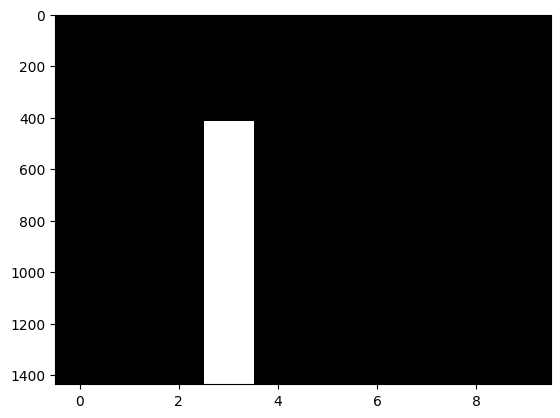

In [25]:
# Missing values
missing_values = df.isna().sum()
ratio_missing_values = df.isna().mean().sort_values()
print(missing_values)
print(ratio_missing_values)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

<Axes: >

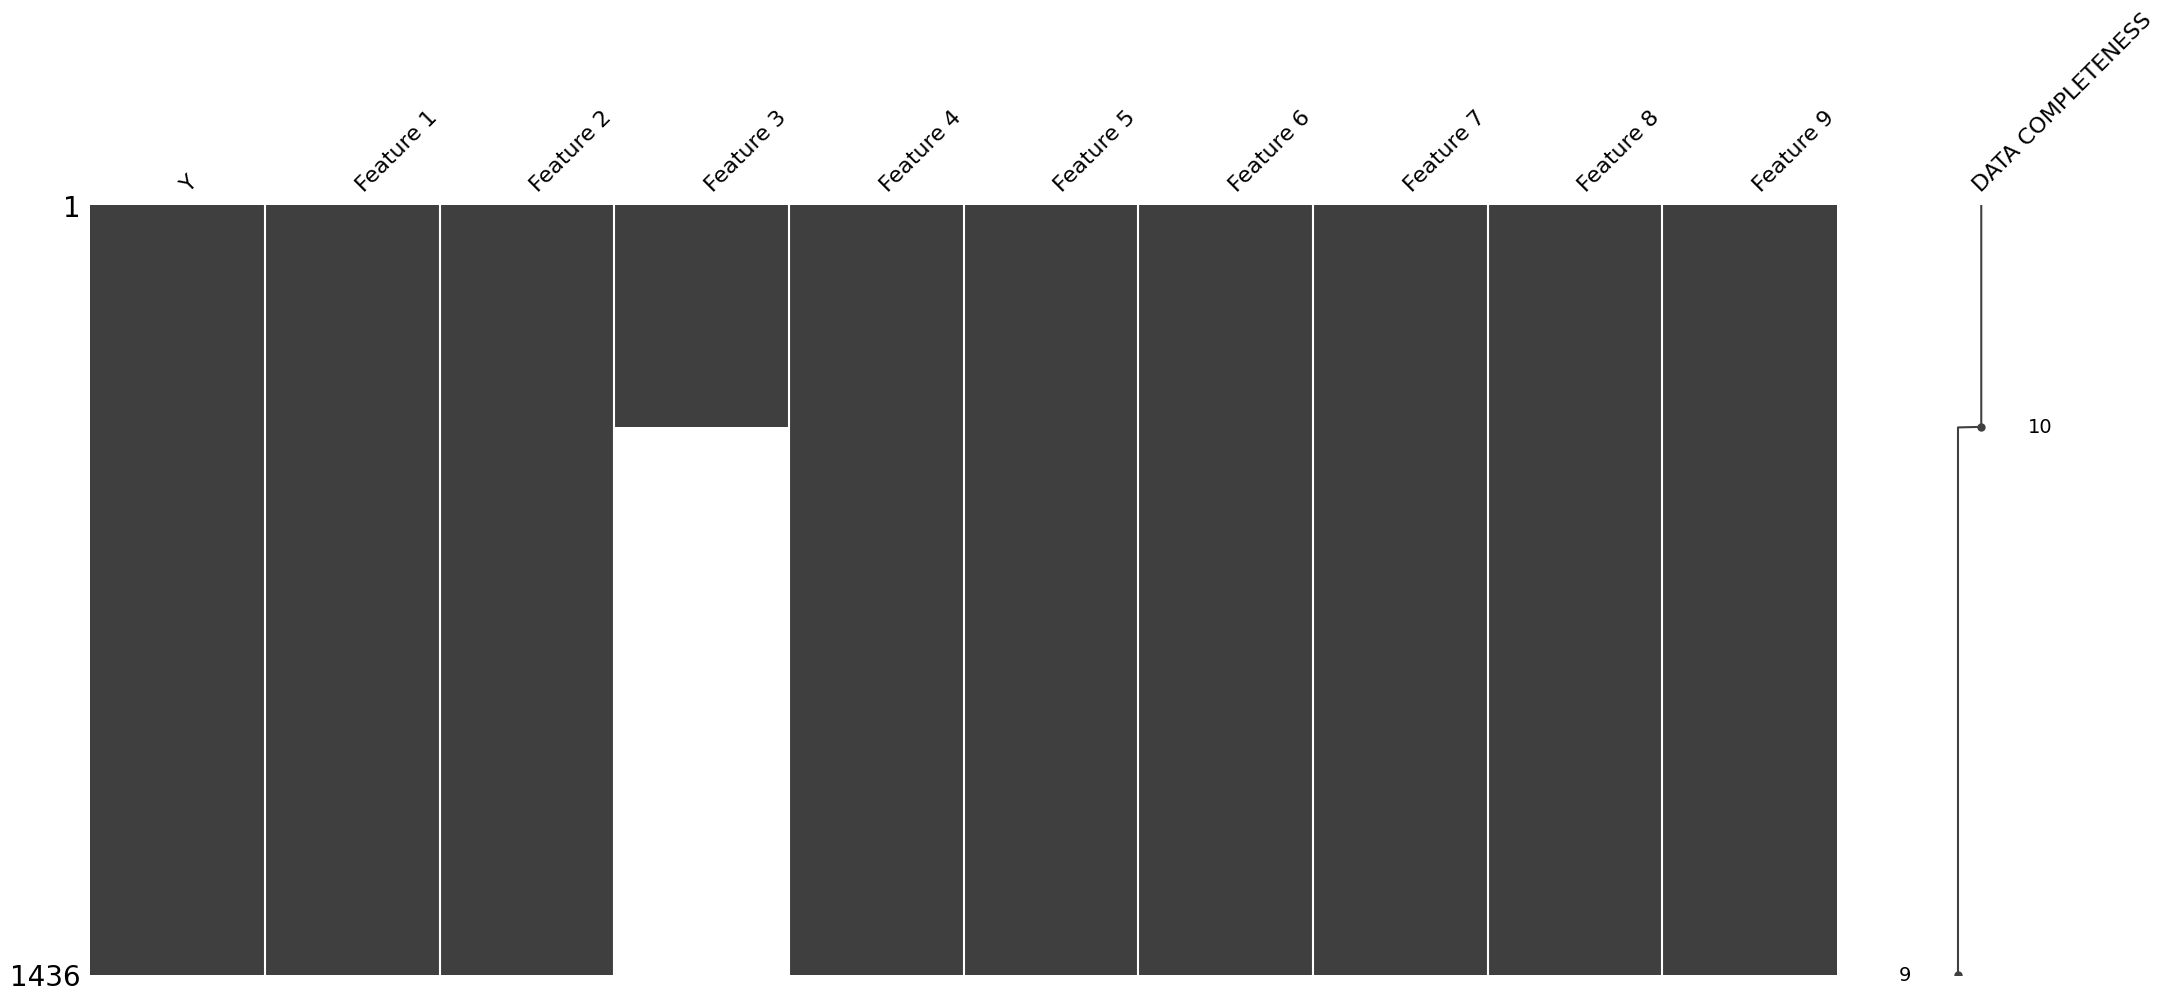

In [26]:
msno.matrix(df, labels=True, sort="descending")

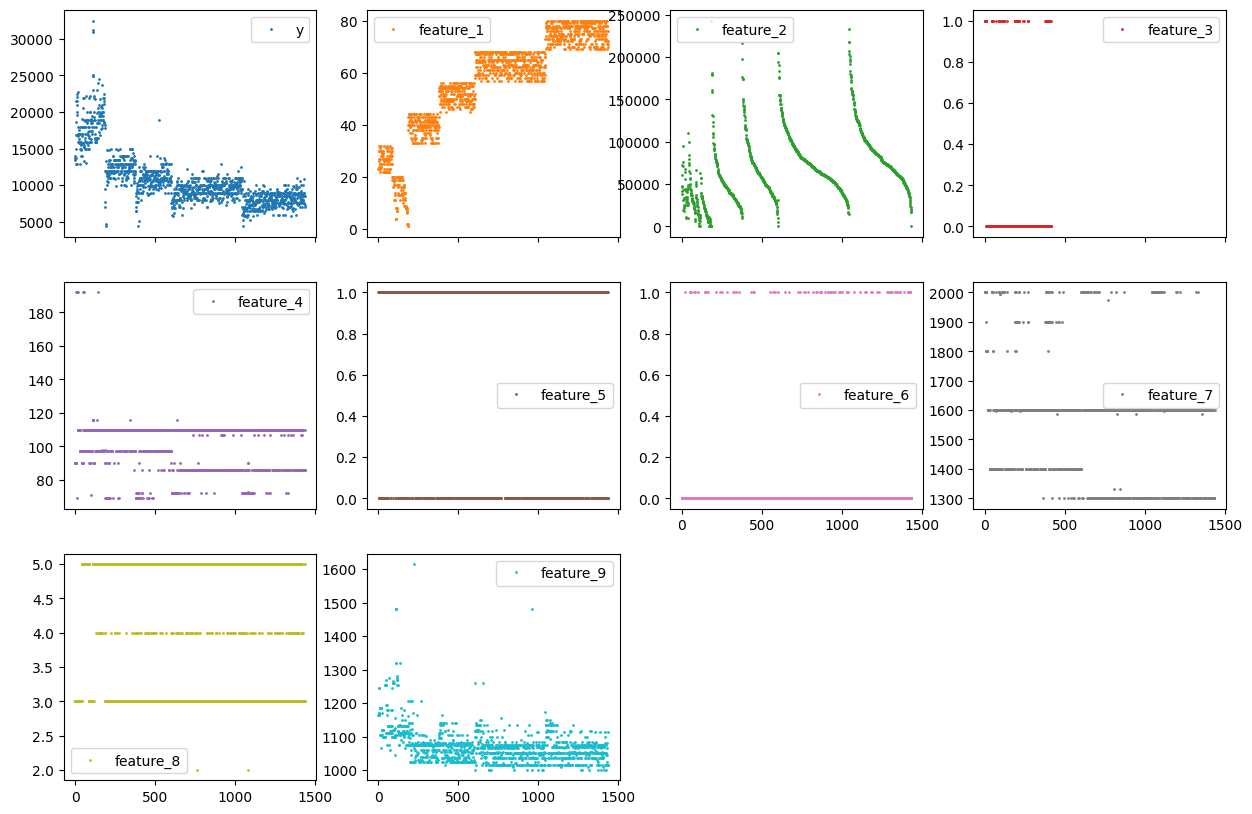

In [18]:
# numerical features
df.plot(lw=0, marker='.', subplots=True, layout=(-1,4), figsize=(15,10), markersize=2);

#### Content Investigation 

In [23]:
df.mode()

,y,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,8950,68,36000,0.0,110,1,0,1600,5,1075


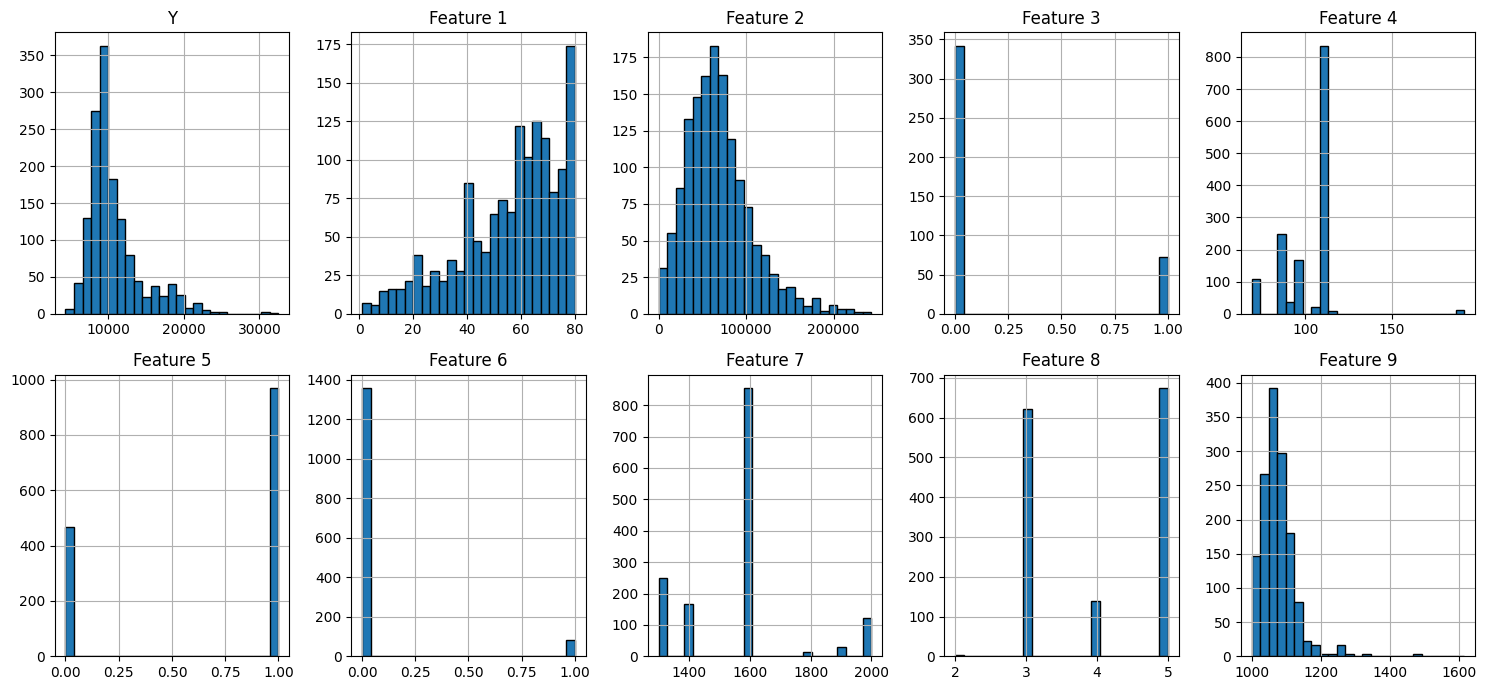

In [42]:
df.hist(bins=25, figsize=(15,7), layout=(-1,5), edgecolor="black")
plt.tight_layout();

Feature 6    0.944290
Feature 5    0.674791
Feature 7    0.589136
Feature 4    0.581476
Feature 8    0.469359
dtype: float64

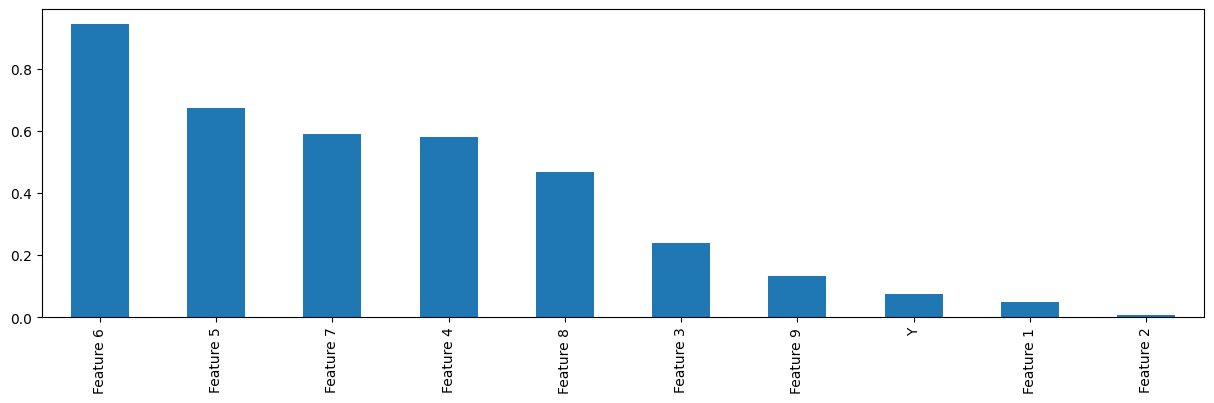

In [43]:
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [46]:
# Handling continuous features

cols_continuous = df.select_dtypes(include="number").nunique() > 12
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(1436, 4)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


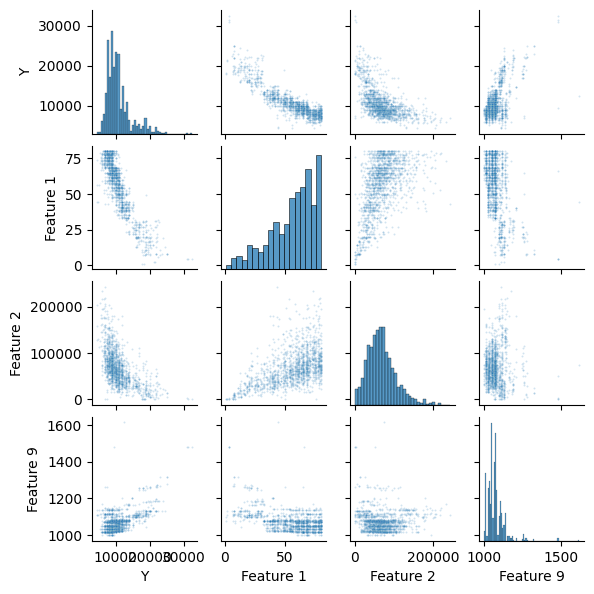

In [47]:
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

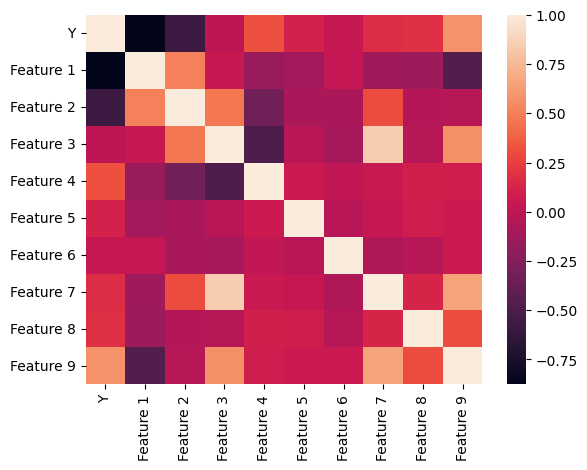

In [50]:
# Feature Relationships 
# Pearson: Evalutes the linear relationship between two continuous variables
# Spearman: Evaluates the monotonic relationship based on the ranked values of eatch feature
df_corr = df.corr(method="pearson")
sns.heatmap(df_corr);

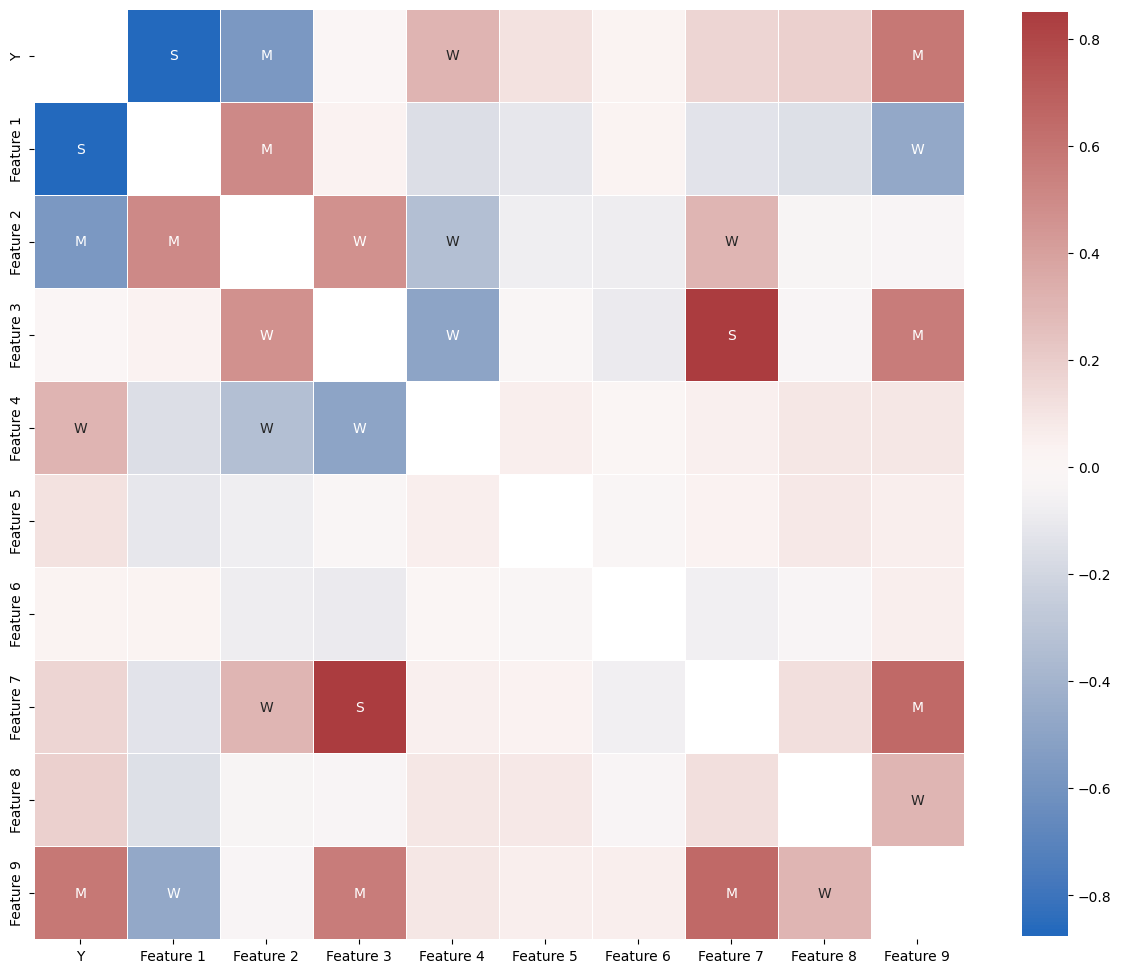

In [51]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [52]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Feature 1  Y           -0.876590
Feature 2  Y           -0.569960
Feature 4  Feature 3   -0.492348
Feature 9  Feature 1   -0.470253
Feature 4  Feature 2   -0.333538
           Feature 1   -0.156622
Feature 8  Feature 1   -0.148359
Feature 7  Feature 1   -0.133182
Feature 5  Feature 1   -0.108150
Feature 6  Feature 3   -0.100631
           Feature 2   -0.081854
Feature 5  Feature 2   -0.080503
Feature 7  Feature 6   -0.069321
Feature 8  Feature 2   -0.036197
           Feature 3   -0.032324
Feature 9  Feature 2   -0.028598
Feature 8  Feature 6   -0.027654
Feature 5  Feature 3   -0.019695
Feature 6  Feature 5   -0.019335
Feature 3  Y           -0.000113
Feature 6  Feature 4    0.013144
           Feature 1    0.031717
           Y            0.033081
Feature 7  Feature 5    0.034921
Feature 3  Feature 1    0.040223
Feature 7  Feature 4    0.050884
Feature 9  Feature 6    0.057249
           Feature 5    0.057929
Feature 5  Feature 4    0.058712
Feature 8  Feature 5    0.085243
Feature 9 

### Build Your Model 

In [191]:
# Make pipeline
df = load_data(filename="data.csv")

# Execute pipeline steps and evaluate metric
train_X, val_X, train_y, val_y = (
                                  df.pipe(start_pipeline)
                                  .pipe(clean_dataset)
                                  .pipe(remove_outliers)
                                  .pipe(split_data))




There are 1022 missing values in feature 3 column



In [192]:
regressor = DecisionTreeRegressor
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 10, 15, 20]:
    metric = "mae"
    my_mae = evaluate_mae(regressor, train_X, val_X, train_y, val_y, error=metric, max_leaf_nodes=max_leaf_nodes)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  1591
Max leaf nodes: 10  		 Mean Absolute Error:  1259
Max leaf nodes: 15  		 Mean Absolute Error:  1025
Max leaf nodes: 20  		 Mean Absolute Error:  990


In [193]:
regressors = [RandomForestRegressor, DecisionTreeRegressor, LinearRegression]

metric = "mae"
num_leaf_nodes = 20

for regressor in regressors:
    if regressor == LinearRegression:
            mae = evaluate_mae(regressor, train_X, val_X, train_y, val_y, error=metric)
            print(f" {metric.upper()}: {round(mae,2)} with {regressor.__name__} ")
    else:
        mae = evaluate_mae(regressor, train_X, val_X, train_y, val_y, error=metric, max_leaf_nodes=num_leaf_nodes)
        print(f" {metric.upper()} : {round(mae,2)} with {regressor.__name__} ")

 MAE : 893.47 with RandomForestRegressor 
 MAE : 990.64 with DecisionTreeRegressor 
 MAE: 1050.75 with LinearRegression 
